# The Ripple Effect: How Does One Type of Crime Against Women Influence Others?

**Trend Analysis:**
* **Rape and Assault against Women:** Both crime categories have shown an increasing trend over the years, particularly from 2012 onwards. This suggests a need for more effective measures to prevent and address these crimes.

**Correlation Analysis:**

* **Strong Relationships:** Rape and Assault against Women have strong positive correlations with other crime categories, such as Kidnap & Assault, Dowry Deaths, and Domestic Violence. This indicates that these crimes are often interconnected and may be influenced by similar societal factors.
* **Substitution Effect:** Some states exhibit a substitution effect between Dowry Deaths and Domestic Violence, suggesting that a decrease in one category might lead to an increase in the other. This could be attributed to underlying socio-economic factors or cultural norms.

**Overall Insights:**

* **Prevalence of Violence against Women:** The data clearly demonstrates the prevalence of violence against women in the region. Both rape and assault against women are significant issues that require urgent attention.
* **Interconnectedness of Crimes:** The strong correlations between different crime categories highlight the interconnected nature of violence against women. Addressing one type of violence may also help reduce others.
* Need for Comprehensive Measures: To effectively combat violence against women, comprehensive measures are needed, including:
   * Strengthening law enforcement and judicial systems
   * Promoting gender equality and education
   * Addressing socio-economic disparities
   * Providing support services for victims





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('/content/CrimesOnWomenData.csv')

In [ ]:
df.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [ ]:
df['State'] = df['State'].str.lower()

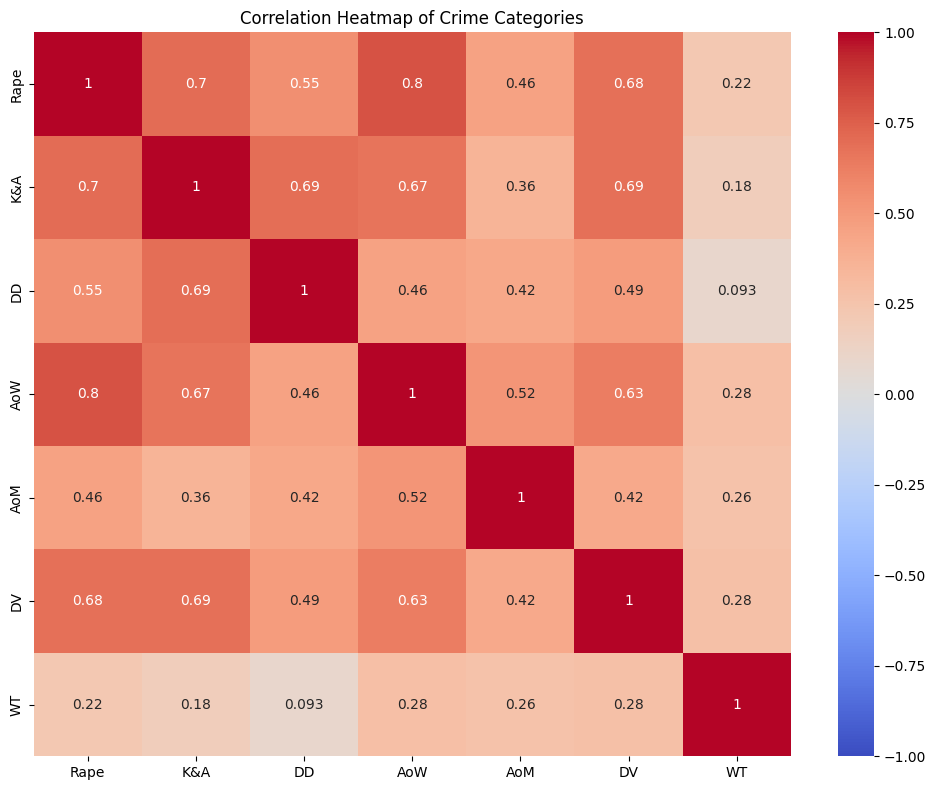

In [ ]:
crime_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
correlation_matrix = df[crime_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Crime Categories')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()


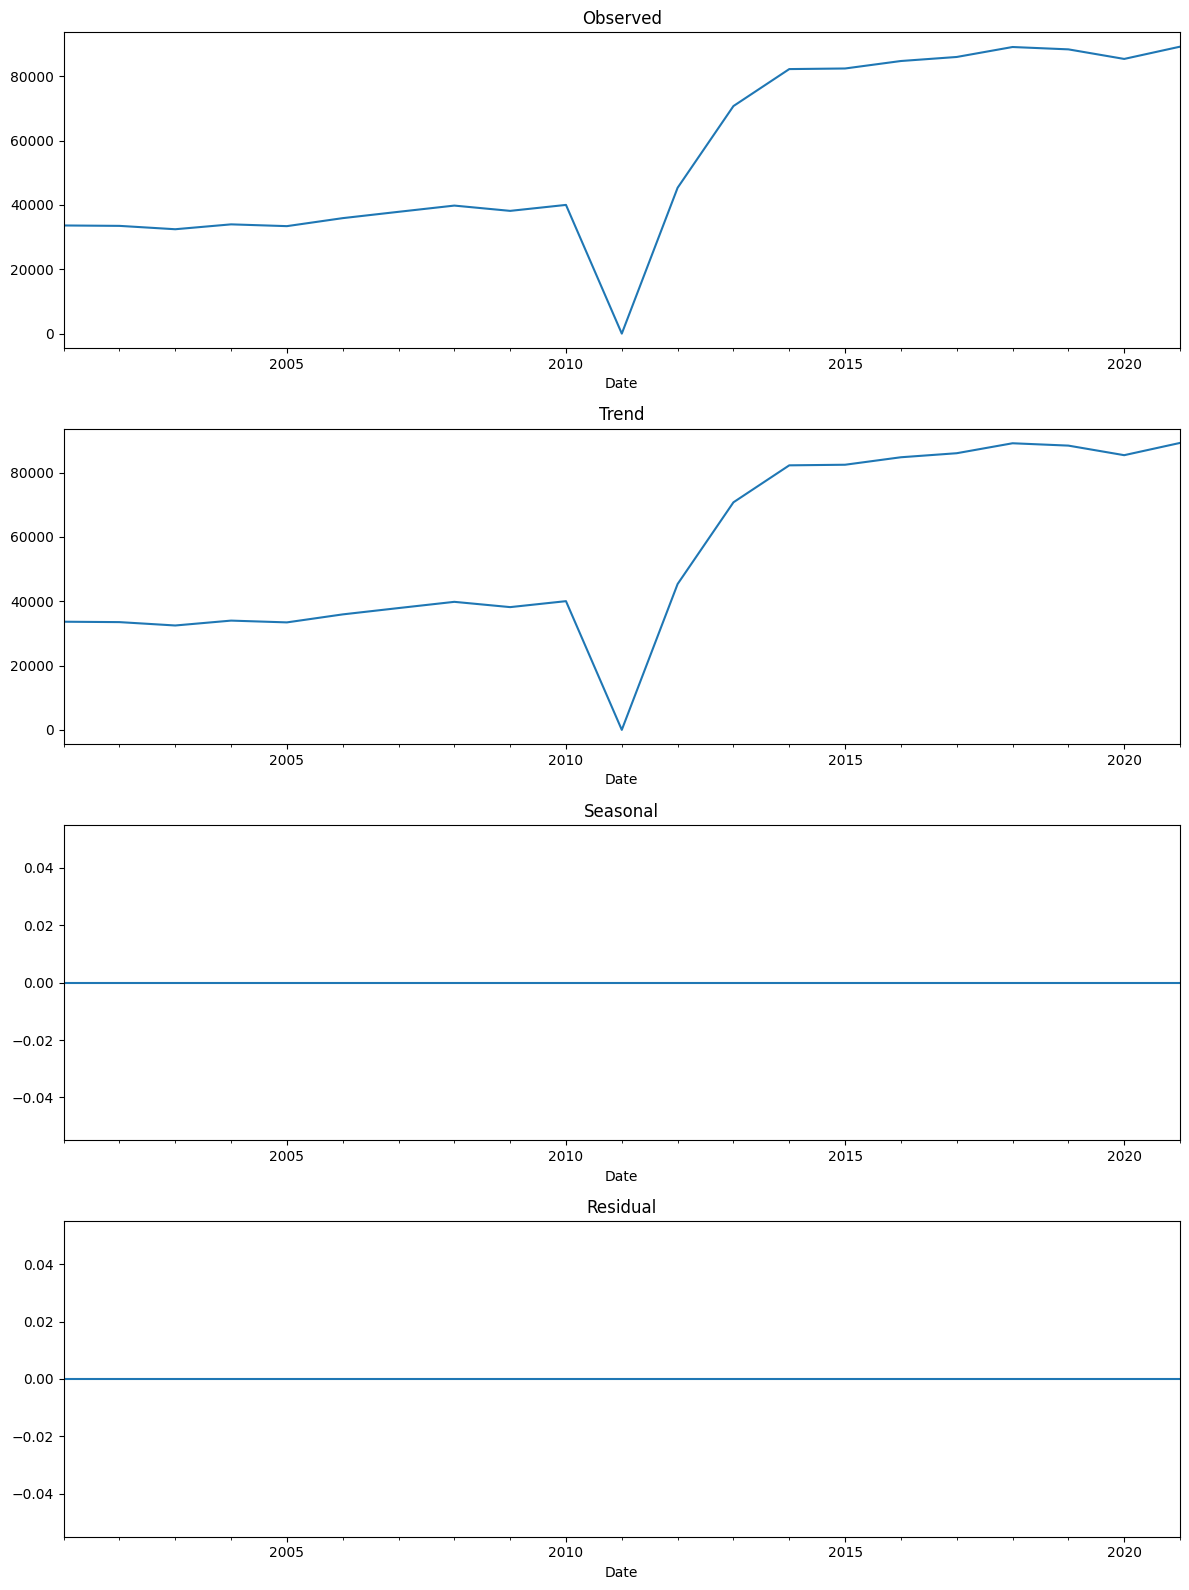

In [ ]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-01-01')
india_total = df.groupby('Date')[crime_columns].sum().reset_index()
aow_series = india_total.set_index('Date')['AoW']
decomposition = seasonal_decompose(aow_series, model='additive', period=1)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.savefig('aow_time_series_decomposition.png')
plt.show()

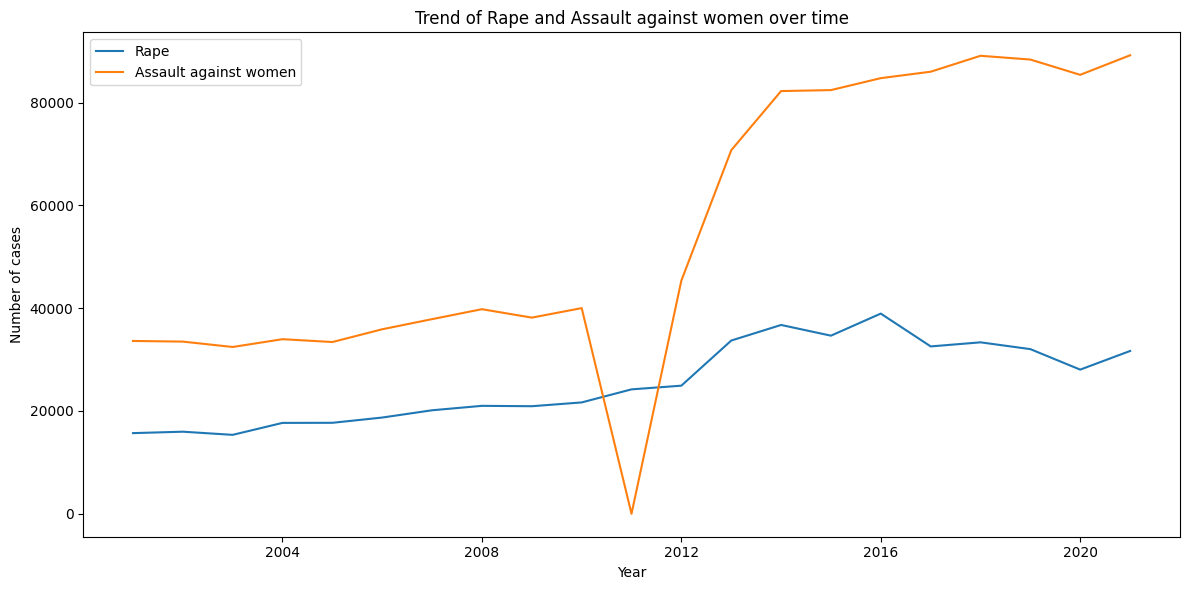

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(india_total['Date'], india_total['Rape'], label='Rape')
plt.plot(india_total['Date'], india_total['AoW'], label='Assault against women')
plt.title('Trend of Rape and Assault against women over time')
plt.xlabel('Year')
plt.ylabel('Number of cases')
plt.legend()
plt.tight_layout()
plt.savefig('rape_aow_trend.png')
plt.show()

In [ ]:
state_averages = df.groupby('State')[crime_columns].mean()
high_dv_aom_states = state_averages[(state_averages['DV'] > state_averages['DV'].median()) &
                                    (state_averages['AoM'] > state_averages['AoM'].median())]
print("States with high rates of both Domestic Violence and Assault against Modesty:")
print(high_dv_aom_states.index.tolist())
def substitution_effect(state_data):
    dd_trend = np.polyfit(state_data['Year'], state_data['DD'], 1)[0]
    dv_trend = np.polyfit(state_data['Year'], state_data['DV'], 1)[0]
    return dd_trend < 0 and dv_trend > 0

states_with_substitution = df.groupby('State').apply(substitution_effect)
print("\nStates showing substitution effect between Dowry Deaths and Domestic Violence:")
print(states_with_substitution[states_with_substitution].index.tolist())

States with high rates of both Domestic Violence and Assault against Modesty:
['andhra pradesh', 'assam', 'delhi ut', 'gujarat', 'haryana', 'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'rajasthan', 'tamil nadu', 'telangana', 'uttar pradesh', 'uttarakhand', 'west bengal']

States showing substitution effect between Dowry Deaths and Domestic Violence:
['chandigarh', 'haryana', 'karnataka', 'madhya pradesh', 'meghalaya', 'mizoram', 'odisha', 'puducherry', 'rajasthan', 'tamil nadu', 'telangana', 'uttar pradesh', 'west bengal']


In [ ]:
with open('analysis_results.txt', 'w') as f:
    f.write("Correlation Analysis Results:\n")
    f.write(str(correlation_matrix))
    f.write("\n\nStates with high rates of both Domestic Violence and Assault against Modesty:\n")
    f.write(str(high_dv_aom_states.index.tolist()))
    f.write("\n\nStates showing substitution effect between Dowry Deaths and Domestic Violence:\n")
    f.write(str(states_with_substitution[states_with_substitution].index.tolist()))